True
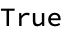

In [136]:
ClearAll["Global`*"];
{brown,green,beige,blue}=RGBColor/@{"#640125","#6e7955","#cbb994","#165e83"};
<<"MaTeX`";

(* parameters *)
nu=1. (* heat conductivity *);
SimTime=0.15;
BoxSize=1;
{tMin,tMax}={0,SimTime} (* time *);
{xMin,xMax}={-BoxSize/2.,BoxSize/2.} (* x coordinate *);
xgr=128;dx=BoxSize/(xgr-1);
tgr=6144;dt=SimTime/(tgr-1);
std=0.1; (* sigma of the random variable *)

nu*dt/dx^2<=1/2 (* for nbumerical stability *)

-Graphics-
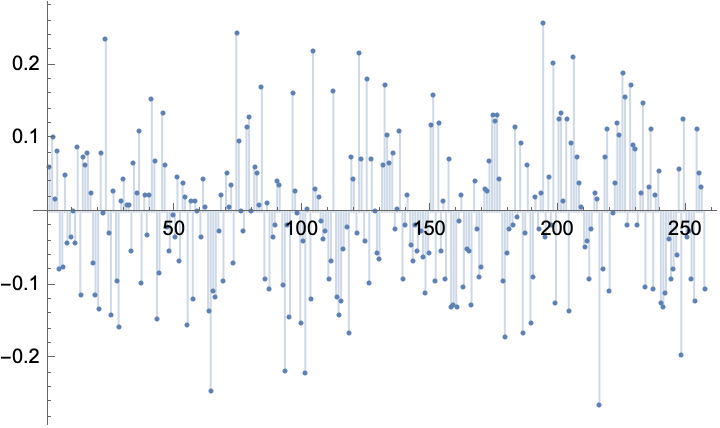

In [241]:
(* Initial conditions NO NEED TO RUN THIS EVERY TIME *)
Xi=RandomFunction[WhiteNoiseProcess[std],{1,2*xgr+1}];
ListPlot[Xi,Filling->Axis]
(* To obtain values, run Xi["Values"][[i]], i=1,...,2*xgr+1 *)

In [243]:
logphiinidata[n_]:=Xi["Values"][[2*xgr+1]]+Sum[Xi["Values"][[i]]*Sin[2*Pi*i*n/(xgr-1)]+Xi["Values"][[i+xgr]]*Cos[2*Pi*i*n/(xgr-1)],{i,1,5}]
data=Array[logphiinidata[#-1]&,xgr];

Export["logphiini_128_01_001.dat",data]; (* _xgr_sigma_ID *)


Syntax::stresc: Unknown string escape \p.

Syntax::stresc: Unknown string escape \p.

-Graphics-
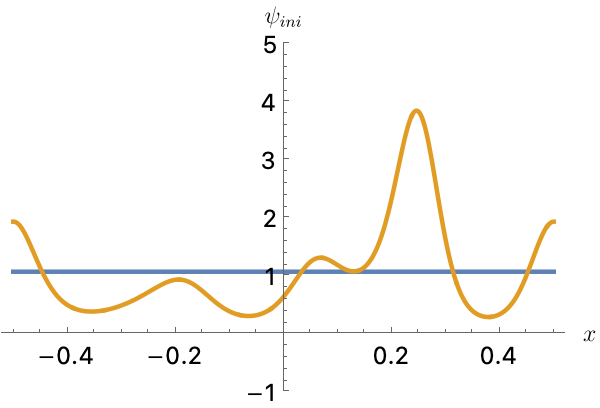

In [308]:
Clear[itpphiini,hom]
dataimp=Import["logphiini_100_01_002.dat"];
dataimpext=Append[dataimp,dataimp[[1]]];
itpimpdata=Interpolation[Table[{j,dataimpext[[j]]},{j,xgr}],InterpolationOrder->3];
itpphiini[x_?NumericQ]:=Exp[-itpimpdata[(x-xMin)/dx+1][[1]]];
(* test 
itpphiini[x_?NumericQ]:=1+0.3*Sin[2*Pi*(x-xMin)/BoxSize];
itpphith[x_?NumericQ,time_?NumericQ]:=1+0.3*Sin[2*Pi*(x-xMin)/BoxSize]*Exp[-4*Pi^2*nu*time/BoxSize^2];
uth[x_?NumericQ,time_?NumericQ]:=-2*Pi*nu/BoxSize*0.3*Cos[2*Pi*(x-xMin)/BoxSize]*Exp[-4*Pi^2*nu*time/BoxSize^2];
*)

hom=Sum[itpphiini[xMin+(i-1)*dx],{i,1,xgr}]/xgr/BoxSize;

thickness=0.04;colorIni=gray;colorFin=sora;
graph1=Plot[{hom,itpphiini[x]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","\psi_{ini}"}],BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"},ImageSize->300,PlotRange->{-1,5},PlotStyle->{{Thickness[thickness/5],sakura},{Thickness[thickness/5],aomidori}}]

1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[--], AbsoluteThickness[2], 
                                                            90
 
>       FontSize -> 17, FontFamily -> Latin Modern Roman, 
 
>       RGBColor[0.392157, 0.00392157, 0.145098]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 17, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.431373, 0.47451, 0.333333]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[2], FontSize -> 17, 
                           90
 
>       FontFamily -> Latin Modern Roman, RGBColor[0.796078, 0.72549, 0.580392]]}, 
 
>     {t=0, t=0.01, t=0.02}, LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Top}, Identity]]
phi250630.pdf
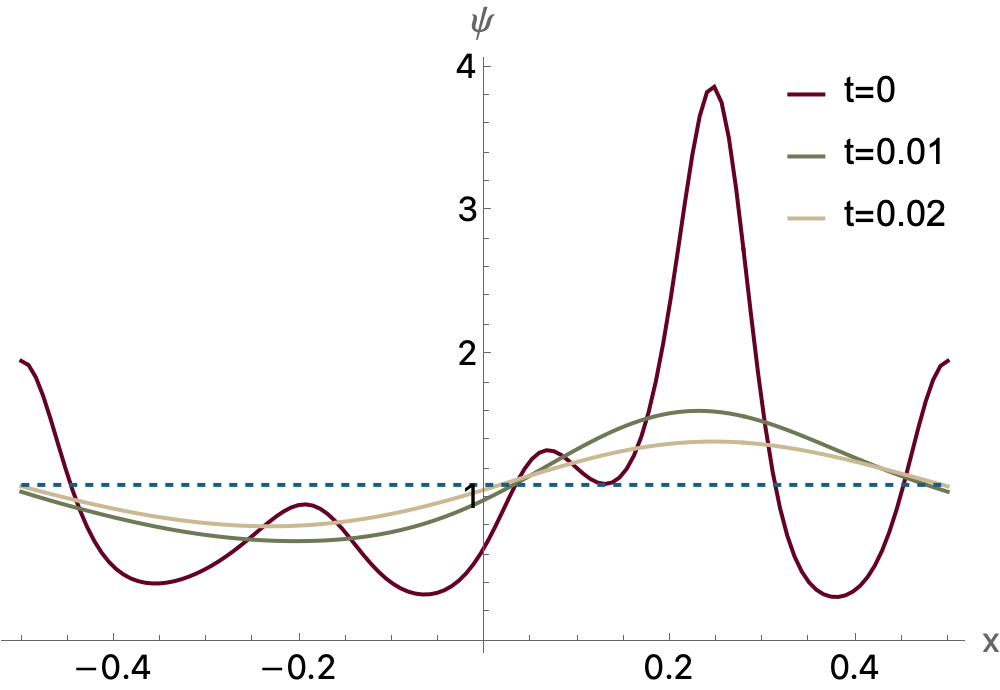
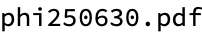

In [319]:
xGrid=Range[xMin,xMax,dx];
phi0={};
For[i=1,i<=xgr,i++,
  AppendTo[phi0,itpphiini[xGrid[[i]]]]
];
phi=phi0;
results={phi};

For[t=1,t<=tgr-1,t++,
  phiNew=phi;
  For[i=2,i<=xgr-1,i++,
    phiNew[[i]]=phi[[i]]+nu*dt/dx^2*(phi[[i-1]]-2*phi[[i]]+phi[[i+1]]);
  ];
  phiNew[[1]]=phi[[1]]+nu*dt/dx^2*(phi[[xgr-1]]-2*phi[[1]]+phi[[2]]);
  phiNew[[xgr]]=phiNew[[1]];
  phi=phiNew;
  AppendTo[results,phi];
];

graph2=ListLinePlot[{results[[1]],results[[410]],results[[820]]},DataRange->{xMin,xMax},PlotRange->All,PlotStyle->{brown,green,beige},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotLegends->Placed[LineLegend[{"t=0","t=0.01","t=0.02"}],{Right,Top}],
 AxesLabel->{"x","\[Psi]"}];
graph22=Plot[hom,{x,xMin,xMax},AxesLabel->{"x",Subscript["\[Psi]","ini"]},BaseStyle->{FontSize->30,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotRange->{-1,5},PlotStyle->{Dashed,blue}];
(* test *)
graph222=Plot[itpphith[x,0.02],{x,xMin,xMax},PlotStyle->{{Dotted,Red}}];

Show[graph2,graph22]
Export["phi250630.pdf",%]


In [321]:
u0={};
approxu0={};
AppendTo[u0,-(nu/(2.*dx))*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[1]]];
AppendTo[approxu0,-(nu/(2.*dx))*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
For[i=2,i<=xgr-1,i++,
  AppendTo[u0,-(nu/(2.*dx))*(results[[1]][[i+1]]-results[[1]][[i-1]])/results[[1]][[i]]];
  AppendTo[approxu0,-(nu/(2.*dx))*(results[[1]][[i+1]]-results[[1]][[i-1]])/hom];
];
AppendTo[u0,-(nu/(2.*dx))*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[xgr]]];
AppendTo[approxu0,-(nu/(2.*dx))*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
u=u0;
approxu=approxu0;
uresults={u};
approxuresults={approxu};

For[t=1,t<=tgr,t++,
  uNew=u;
  approxuNew=approxu;
  uNew[[1]]=-(nu/(2.*dx))*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[1]];
  approxuNew[[1]]=-(nu/(2.*dx))*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  For[i=2,i<=xgr-1,i++,
    uNew[[i]]=-(nu/(2.*dx))*(results[[t]][[i+1]]-results[[t]][[i-1]])/results[[t]][[i]];
    approxuNew[[i]]=-(nu/(2.*dx))*(results[[t]][[i+1]]-results[[t]][[i-1]])/hom;
  ];
  uNew[[xgr]]=-(nu/(2.*dx))*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[xgr]];
  approxuNew[[xgr]]=-(nu/(2.*dx))*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  u=uNew;
  approxu=approxuNew;
  AppendTo[uresults,u];
  AppendTo[approxuresults,approxu];
];

graph3=ListLinePlot[{uresults[[1]],uresults[[41]],uresults[[1227]]},DataRange->{xMin,xMax},PlotRange->All,ImageSize->500,PlotStyle->{brown,green,beige},PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=0.001","\[Tau]=0.005"}],{Right,Top}],
 AxesLabel->{"x","u"},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"}];
graph4=ListLinePlot[{approxuresults[[1]],approxuresults[[41]],approxuresults[[1227]]},DataRange->{xMin,xMax},PlotRange->All,ImageSize->500,PlotStyle->{{Dashed,brown},{Dashed,green},{Dashed,beige}}, 
 AxesLabel->{"x",Subscript["u","approx"]},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"}];
(* test *)
graph44=Plot[uth[x,tMin+1227*dt],{x,xMin,xMax},PlotStyle->{{Dotted,Red}}];

In [ ]:
Show[graph3,graph4]
(* Export["u250630.pdf",%]*)

In [337]:
Reynolds={};
Reynolds2={};
For[t=1,t<=tgr,t++,
  urms2=0;
  dudxrms2=0;
  For[i=1,i<=xgr,i++,
    urms2=urms2+uresults[[t]][[i]]^2;
    If[!(i==1||i==xgr),dudxrms2=dudxrms2+(1/4.)*(uresults[[t]][[i+1]]-uresults[[t]][[i-1]])^2/dx^2]
  ];
  urms=Sqrt[urms2/xgr];
  dudxrms=Sqrt[dudxrms2/(xgr-2)];
  AppendTo[Reynolds,{tMin+t*dt,urms^2/(nu*dudxrms)}];
  AppendTo[Reynolds2,{tMin+t*dt,urms^4/(nu*dudxrms)^2}];
];

In [ ]:
Reynolds[[820]]

1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[---], AbsoluteThickness[2], 
                                                            180
 
>       FontSize -> 17, RGBColor[0.392157, 0.00392157, 0.145098]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], FontSize -> 17, 
                           180
 
>       Dashing[{Small, Small}], RGBColor[0.431373, 0.47451, 0.333333]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], FontSize -> 17, 
                           180
 
>       Dashing[{0, Small, Small, Small}], RGBColor[0.796078, 0.72549, 0.580392]]}, 
 
>     {β, β , β }, LegendMarkers -> 
           0   1
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Right, Center}, Identity]]
beta250707.pdf
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.00694444], 
 
>       AbsoluteThickness[2], FontSize -> 12, Dashing[{Small, Small}], 
 
>       RGBColor[0.431373, 0.47451, 0.333333]], 
 
>      Directive[PointSize[0.00694444], AbsoluteThickness[2], FontSize -> 12, 
 
>       RGBColor[1, 0, 0]]}, {|δ|, Re}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> {}, LegendLayout -> Column], {Right, Center}, Identity]]
                                                             1
Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[---], AbsoluteThickness[2], 
                                                            360
 
>       FontSize -> 12, Dashing[{Small, Small}], RGBColor[0.431373, 0.47451, 0.333333]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], FontSize -> 12, 
                           360
 
>       Dashing[{0, Small, Small, Small}], RGBColor[0.796078, 0.72549, 0.580392]], 
 
                            1
>      Directive[PointSize[---], AbsoluteThickness[2], FontSize -> 12, 
                           360
 
                                                 1
>       RGBColor[1, 0, 0]], Directive[PointSize[---], AbsoluteThickness[2], 
                                                360
 
                                                            2
>       FontSize -> 12, RGBColor[0, 0, 1]]}, {ε , ε , Re, Re }, 
                                               0   1
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True}, LabelStyle -> {}, LegendLayout -> Column], 
 
>    {Left, Bottom}, Identity]]
Re250707.pdf
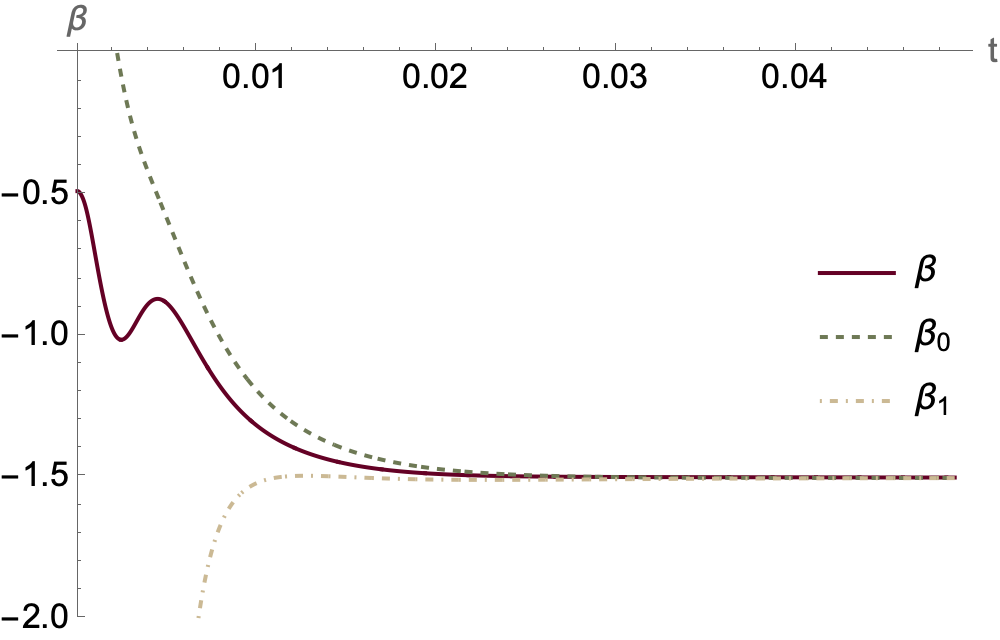
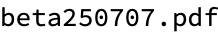
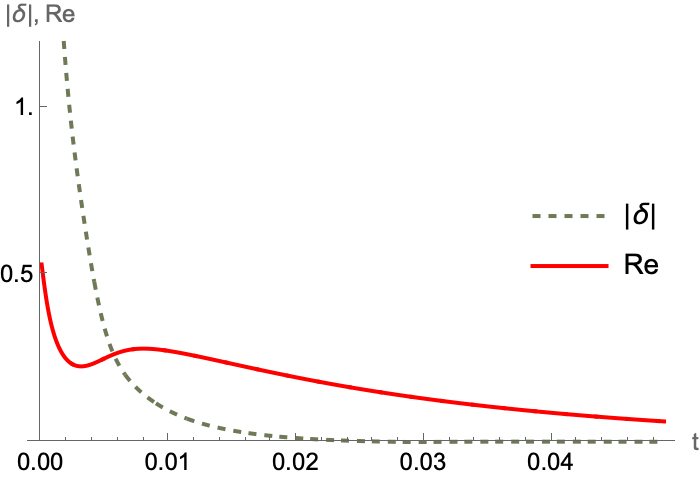
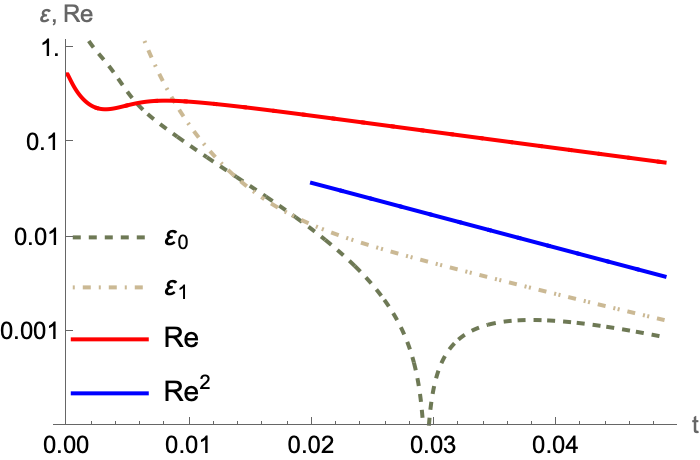
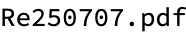

In [375]:
beta={};
beta0={};
beta1={};
ratiobeta0={};
ratiobeta1={};
test={};
For[t=1,t<=3500,t++,
  betaa=Sum[uresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[uresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  betab=Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  betac=Sum[approxuresults[[t]][[i]]^4*(5.-4.*results[[t]][[i]]/hom),{i,1,xgr}]*xgr/Sum[approxuresults[[t]][[i]]^2*(3.-2.*results[[t]][[i]]/hom),{i,1,xgr}]^2-3.;
  AppendTo[beta,{tMin+t*dt,betaa}];
  AppendTo[beta0,{tMin+t*dt,betab}];
  AppendTo[beta1,{tMin+t*dt,betac}];
  AppendTo[ratiobeta0,{tMin+t*dt,Abs[1-betab/betaa]}];
  AppendTo[ratiobeta1,{tMin+t*dt,Abs[1-betac/betaa]}];
  AppendTo[test,{tMin+t*dt,Exp[-40*(tMin+t*dt)]}]
];

graph11=ListLinePlot[{beta[[1;;2000]],beta0[[1;;2000]],beta1[[1;;2000]]},PlotRange->{-2,0},BaseStyle->{FontSize->17},PlotStyle->{brown,{Dashed,green},{DotDashed,beige}},ImageSize->500,PlotRangeClipping->False,
 PlotLegends->Placed[LineLegend[{"\[Beta]",Subscript["\[Beta]",0],Subscript["\[Beta]",1]}],{Right,Center}],AxesLabel->{"t","\[Beta]"}]
Export["beta250707.pdf",%]
graph12=ListLinePlot[{ratiobeta0[[1;;2000]],Reynolds[[1;;2000]]},PlotRange->{0,1.2},BaseStyle->{FontSize->12},ImageSize->350,PlotStyle->{{Dashed,green},Red},PlotRangeClipping->False,PlotLegends->Placed[LineLegend[{"|\[Delta]|","Re"}],{Right,Center}],
 Ticks->{Automatic,{0,0.5,1.0,1.5}},AxesLabel->{"t","|\[Delta]|, Re"}]
graph13=ListLogPlot[{ratiobeta0[[1;;2000]],ratiobeta1[[1;;2000]],Reynolds[[1;;2000]],Reynolds2[[820;;2000]]},PlotRange->{0.0001,1.2},BaseStyle->{FontSize->12},ImageSize->350,PlotStyle->{{Dashed,green},{DotDashed,beige},Red,Blue},PlotRangeClipping->False,PlotLegends->Placed[LineLegend[{Subscript["\[CurlyEpsilon]",0],Subscript["\[CurlyEpsilon]",1],"Re",Superscript["Re",2]}],{Left,Bottom}],Joined->True,
 Ticks->{Automatic,{0.001,0.01,0.1,1.0}},AxesLabel->{"t","\[CurlyEpsilon], Re"}]
Export["Re250707.pdf",%]

(* test *)
graph1313=ListLogPlot[test[[1;;3500]]];

In [2]:
Integrate[x*(x^2-1)^2,{x,0,1}]

1
-
6

-2   4
                      Sqrt[c  ] c  Sqrt[Pi]      2
ConditionalExpression[---------------------, Re[c ] > 0]
                                 2
                                c /4
                             4 E
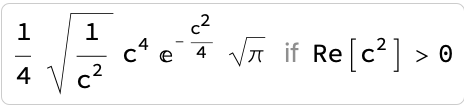

In [3]:
Integrate[k*Sin[k]*Exp[-k^2/c^2],{k,0,Infinity}]